## Assignment: $k$ Means Clustering

## **Do two questions.**

`! git clone https://www.github.com/DS3001/kmc`

**Q1.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [63]:
#Question 1
!git clone https://www.github.com/DS3001/kmc
import pandas as pd
df = pd.read_csv('/content/kmc/data/airbnb_hw.csv')
print(df.head())
print(df.describe())
print(df['Price'].value_counts())
df['Price'] = df['Price'].str.replace(',','')
df['Price'] = pd.to_numeric(df['Price'], errors= 'coerce')
print(df['Price'].value_counts())
print(df.Beds.isna().sum())
df['Beds']=df['Beds'].fillna(1)
print(df.Beds.isna().sum())
print(df['Number Of Reviews'].isna().sum())
pd.crosstab(df['Review Scores Rating'].isnull(), df['Number Of Reviews']>0)
df.describe()
X=df.loc[:,['Price','Beds','Number Of Reviews','Review Scores Rating']]
X=X.dropna()
X.describe()

fatal: destination path 'kmc' already exists and is not an empty directory.
    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private room  11206.0   1.0   
2     Apartment                         NaN     Private room  10032.0   1.0   
3     Apartment                         NaN  Entire home/apt  10024.0   3.0   
4     Apartment                        95.0     Private room  1003

,Price,Beds,Number Of Reviews,Review Scores Rating
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,154.787633,1.556985,16.505439,91.993230
std,148.836621,1.043273,24.308241,8.850373
min,10.000000,0.000000,1.000000,20.000000
25%,85.000000,1.000000,2.000000,89.000000
50%,125.000000,1.000000,7.000000,94.000000
75%,190.000000,2.000000,20.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [64]:
#Question 2
def maxmin(x):
    u = (x-min(x))/(max(x)-min(x))
    return u

Y = X.drop(['Price'],axis=1).apply(maxmin)
Y.describe()

,Beds,Number Of Reviews,Review Scores Rating
count,22155.000000,22155.000000,22155.000000
mean,0.097312,0.060568,0.899915
std,0.065205,0.094954,0.110630
min,0.000000,0.000000,0.000000
25%,0.062500,0.003906,0.862500
50%,0.062500,0.023438,0.925000
75%,0.125000,0.074219,1.000000
max,1.000000,1.000000,1.000000


In [65]:
#Question 3
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


model = KMeans(n_clusters=6, max_iter=300, n_init = 10, random_state=0)
model = model.fit(Y)
Y['cluster'] = model.labels_
Y.describe()

,Beds,Number Of Reviews,Review Scores Rating,cluster
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,0.097312,0.060568,0.899915,2.040081
std,0.065205,0.094954,0.110630,1.473279
min,0.000000,0.000000,0.000000,0.000000
25%,0.062500,0.003906,0.862500,1.000000
50%,0.062500,0.023438,0.925000,1.000000
75%,0.125000,0.074219,1.000000,2.000000
max,1.000000,1.000000,1.000000,5.000000


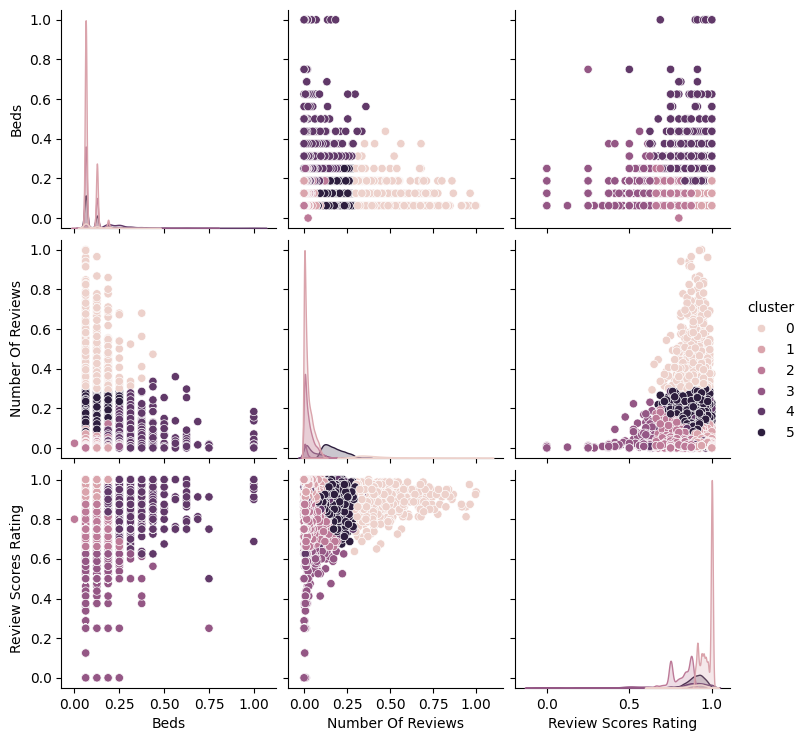

In [66]:
#Question 4
import seaborn as sns
sns.pairplot(data=Y,hue='cluster')

In [67]:
#Question 5
X['cluster'] = model.labels_
X.loc[:,['Price','cluster'] ].groupby('cluster').describe()
#The cluster with the highest rental prices is cluster 4, which is about $300 per night, which is about twice the price of any other cluster.
#It also has a huge standard deviation of ~260, and all of it's quartiles are also higher than any other cluster's.
# All of the other clusers hare about ~$140 per night, with standar ddeviations of about 100, except for Cluster 1 at a st dev of ~147, and cluster 3 at ~215.

Price                                                              
           count        mean         std   min     25%    50%     75%      max
cluster                                                                       
0          794.0  133.238035   83.077776  27.0   80.00  110.0  168.50    875.0
1        10512.0  152.233352  147.281729  10.0   85.00  130.0  190.00  10000.0
2         5554.0  131.496579  102.621585  20.0   75.00  110.0  169.00   5000.0
3          632.0  133.587025  215.505565  25.0   65.00   99.0  151.25   5000.0
4         1633.0  293.458665  262.439199  27.0  150.00  229.0  350.00   4500.0
5         3030.0  141.674917   84.134011  22.0   87.25  125.0  175.00   1000.0

Text(0.5, 1.0, 'Scree Plot')

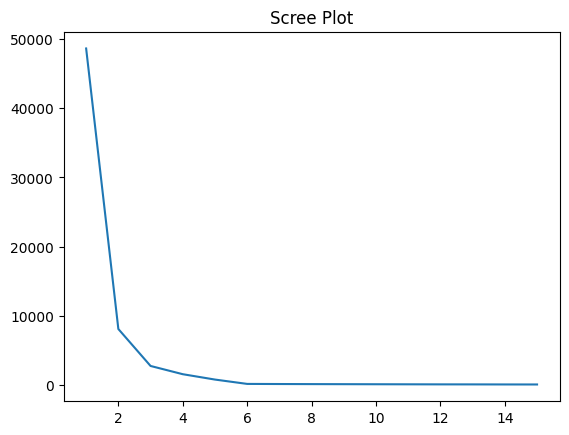

In [69]:
#Question 6
import numpy as np
k_bar = 15
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(Y)
    SSE[k] = model.inertia_

sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')
#It appears to be the lowest at 6, but we already did that in the previous step. Let's try a cluster of 2 instead.

Price                                                           
           count        mean         std   min   25%    50%    75%      max
cluster                                                                    
0        16860.0  144.507711  131.971650  10.0  80.0  125.0  180.0  10000.0
1         5295.0  187.520302  189.287613  22.0  93.0  145.0  220.0   5000.0

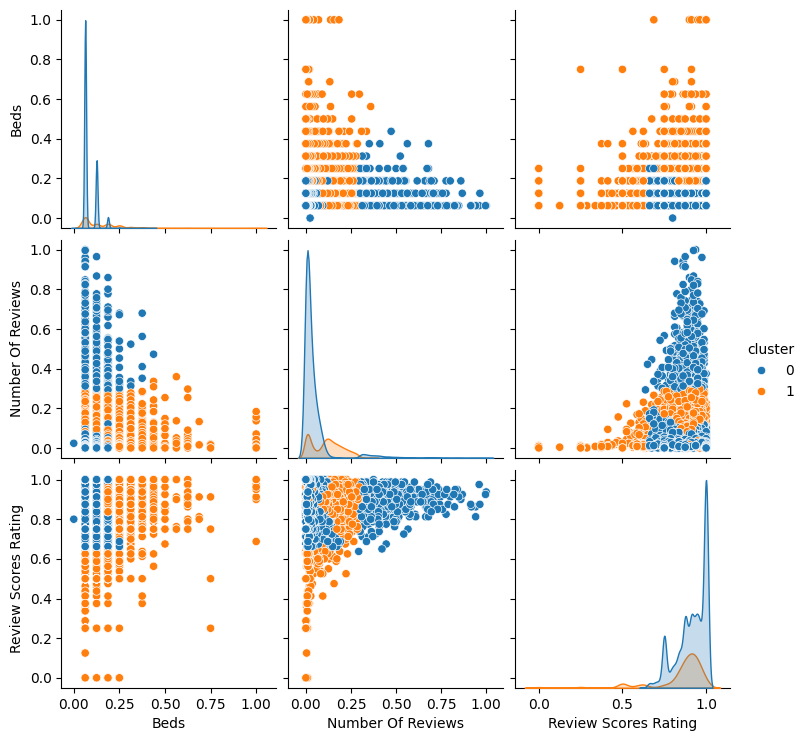

In [71]:
model = KMeans(n_clusters=2, max_iter=300, n_init = 10, random_state=0)
model = model.fit(Y)
Y['cluster'] = model.labels_

sns.pairplot(data=Y,hue='cluster')

X['cluster'] = model.labels_
X.loc[:,['Price','cluster'] ].groupby('cluster').describe()
#To summarize what I see, cluser 0 seems to have a higher number of reviews and higher ratings, despite having a lower price.
#Meanwhle, Cluster 1 has a lower number of reviews, and more beds, but a higher price.

**Q2.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [72]:
#Question 1
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

<Axes: xlabel='x1', ylabel='x2'>

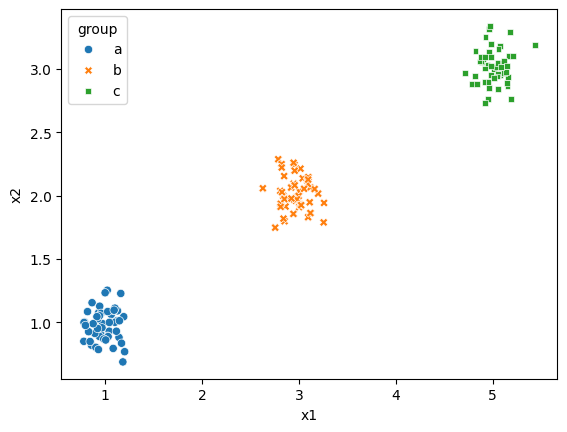

In [73]:
#Question 2
sns.scatterplot(data = df0_125, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

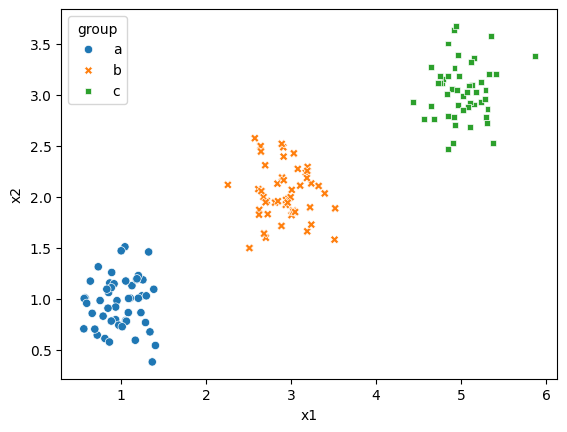

In [74]:
#Question 2 (cont.)
sns.scatterplot(data = df0_25, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

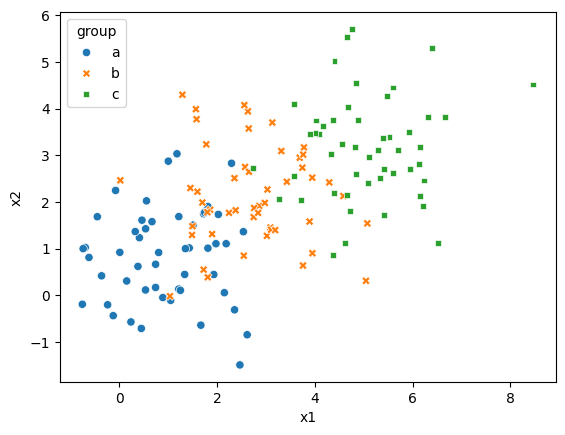

In [76]:
#Question 2 (cont.)
sns.scatterplot(data = df1_0, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

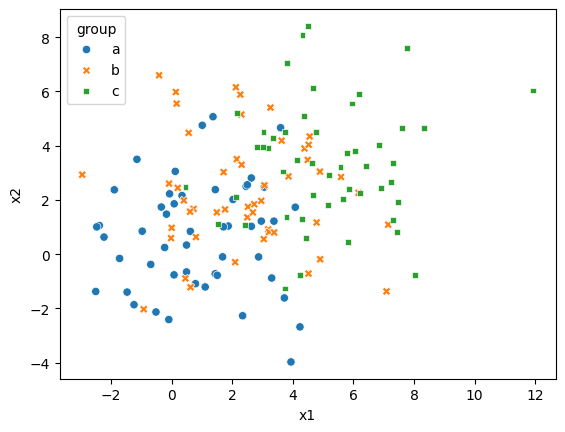

In [77]:
#Question 2 (cont.)
sns.scatterplot(data = df2_0, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

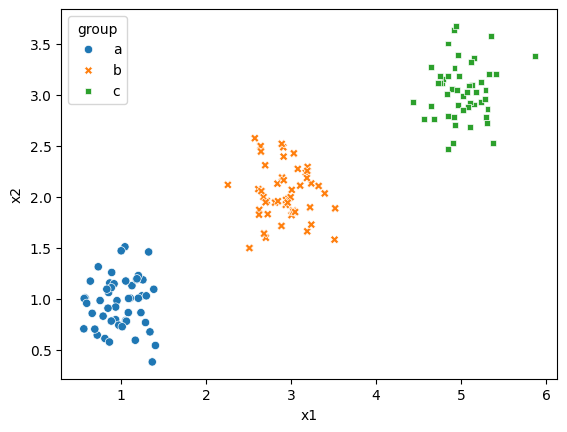

In [78]:
#Question 2 (cont.)
#As noise increases, the visual distinctiveness of the clusters decrease, as they become more spread out and intermixed.

Text(0.5, 1.0, 'Scree Plot')

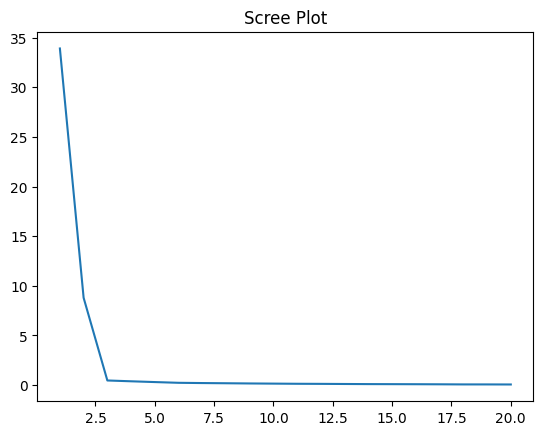

In [82]:
#Question 3
def maxmin(x):
    x = (x-min(x))/(max(x)-min(x))
    return x

X = df0_125.loc[ : , ['x1','x2'] ]
X = X.apply(maxmin)
k_bar = 20
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(X)
    SSE[k] = model.inertia_
scree_plot, axes = plt.subplots()
sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')

Text(0.5, 1.0, 'Scree Plot')

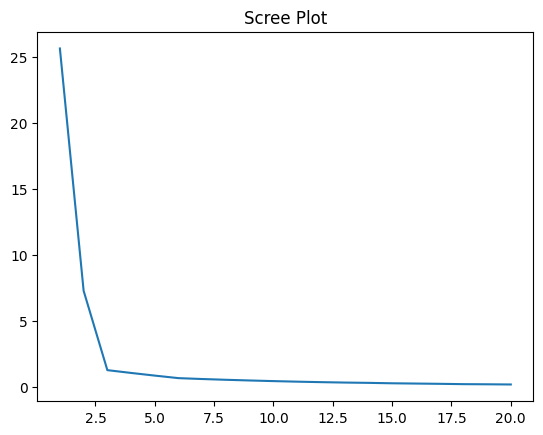

In [84]:
#Question 3 (cont.)
X = df0_25.loc[ : , ['x1','x2'] ]
X = X.apply(maxmin)
k_bar = 20
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(X)
    SSE[k] = model.inertia_
scree_plot, axes = plt.subplots()
sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')

Text(0.5, 1.0, 'Scree Plot')

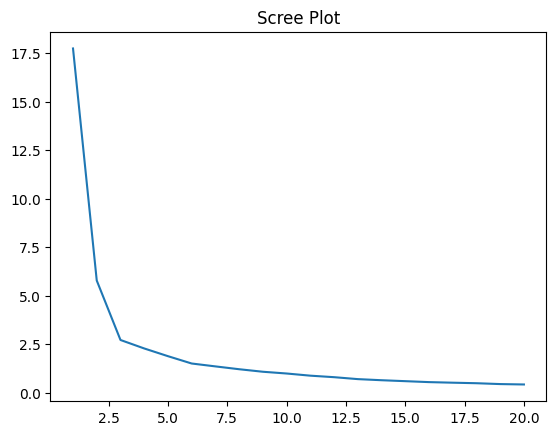

In [85]:
#Question 3 (cont)
X = df0_5.loc[ : , ['x1','x2'] ]
X = X.apply(maxmin)
k_bar = 20
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(X)
    SSE[k] = model.inertia_
scree_plot, axes = plt.subplots()
sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')

Text(0.5, 1.0, 'Scree Plot')

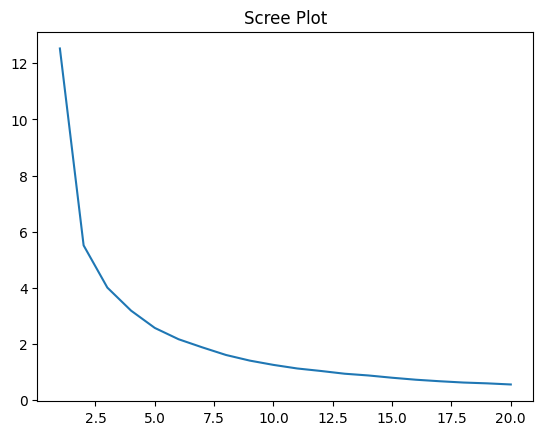

In [86]:
#Question 3 (cont)
X = df1_0.loc[ : , ['x1','x2'] ]
X = X.apply(maxmin)
k_bar = 20
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(X)
    SSE[k] = model.inertia_
scree_plot, axes = plt.subplots()
sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')

Text(0.5, 1.0, 'Scree Plot')

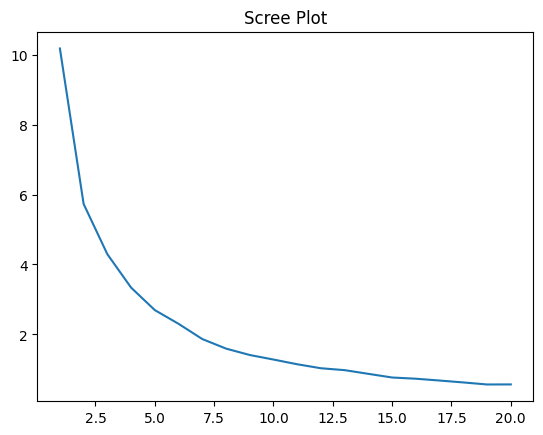

In [88]:
#Question 3 (cont)
X = df2_0.loc[ : , ['x1','x2'] ]
X = X.apply(maxmin)
k_bar = 20
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(X)
    SSE[k] = model.inertia_
scree_plot, axes = plt.subplots()
sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')

In [ ]:
#Question 3 (cont)
#The level of noise essentially rounds out and smoothes out the curve, making it difficult to see any "elbow" in the dataset.
# We Can see in the first plot that the error begins all the way at 35, but goes down rather quickly in an obvious elbow right after 2.5.
#Right after, the initial error drops to about 25, and the curve afterwards becomes a lot smoother.
#By the end, the initial error is 10, and it becomes impossible to see any elbow, as the curve is extremely smooth.

In [ ]:
#Question 4
# The intuition of the elbow is that increasing the number of clusters will decrease the error of the model - but at some point, the model will become overtrained and overfitted to the training data.
#Even though the error on the training data may be decreasing, it's error in the real-world may increase. Therefore, there's diminishing returns that an increased k brings.
# The "elbow" is before the curve flattens out, as a heuristic for the ideal tradeoff between training & real world accuracy.
# In this example, the eblow is crearly distinct when the noise level is low. When the noise level passes 1.0, however, the elbow disappears, and the curve becomes smooth, since it's not having any breakthroughs at uncovering patterns.
#This is because when the noise increases, the groups becomes more spread out and overlap with each other, which makes it more difficult for the clustering algorithm to find distinct clusters.

**Q3.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?